In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import os

In [2]:
atac="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.29.2021_bias_filters_500/final_model_step3/unplug/"
dnase="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/DNASE/K562/4_1_shifted_DNASE_10.05.2021_bias_filters_128/final_model_step3/unplug/"

In [3]:
atac_full="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.29.2021_bias_filters_500/final_model_step3/"
dnase_full="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/DNASE/K562/4_1_shifted_DNASE_10.05.2021_bias_filters_128/final_model_step3/"

In [4]:
def load_data(path):
    motif_set = pkl.load(open(os.path.join(path, "k562_motifs_set1_data"), "rb"))
    motif_set.extend(pkl.load(open(os.path.join(path, "k562_motifs_set2_data"), "rb")))
    return motif_set

In [5]:
data_atac = load_data(atac)
data_dnase = load_data(dnase)
data_atac_full = load_data(atac_full)
data_dnase_full = load_data(dnase_full)

In [36]:
# gata, tal, gata+tal
#index = [2,4,3]
#lims = [0.005, 0.003,0.008]

#ctcf, sp1, nfyb, gabpa
#index = [0,1,5,6]
#ylims = [0.02,0.004, 0.003,0.004]

# , ctcf, sp1, nfyb, gabpa, bach, nrf, hnf4g
#index = [3,0,1,5]
#ylims = [0.006, 0.07,0.005, 0.004]

index = [3,0,1,5]
ylims = [0.006, 0.07,0.005, 0.004]

#index = [6, 7,8,9]
#ylims = [0.004, 0.01, 0.02,0.003]

#index = [3,5, 6]
#ylims = [0.006,0.006, 0.006]

#index = [7,8,9]
#ylims = [ 0.02, 0.02,0.02]

index = [2,4,3]
ylims = [ 0.006, 0.006,0.006]

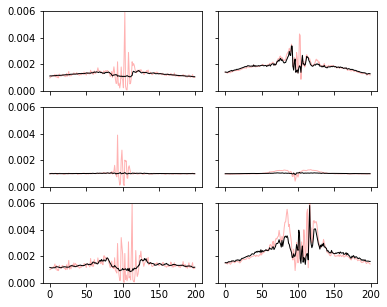

In [37]:
def plot_tracks(pred_unplug_bias, pred_bias, ax=None, ylim=0.01, start=500-100+5, end=500+100+5 ):
    width = end - start
    ax.plot(range(width), pred_bias[:, start:end].mean(0), 'r', linewidth=1, alpha=0.3, label="uncorrected")
    ax.plot(range(width), pred_unplug_bias[:, start:end].mean(0), 'k', linewidth=1, label="corrected")
    ax.set_ylim(0,ylim)  
    #ax.yaxis.set_ticks([0,0.001,0.002,0.003])
    #ax.legend(

num=31213
import numpy as np
plt.rcParams["figure.figsize"] = (6,5)
#fig, axs = plt.subplots(len(index),5,sharex=True, sharey=True)
fig, axs = plt.subplots(len(index),2, sharex=True, sharey=True)

for i in range(len(index)):
    idx =index[i]
    plot_tracks(np.array(data_atac[idx]).reshape(num,1000), np.array(data_atac_full[idx]).reshape(num,1000), axs[i,0], ylims[i])
    plot_tracks(np.array(data_dnase[idx]).reshape(num,1000), np.array(data_dnase_full[idx]).reshape(num,1000), axs[i,1], ylims[i])

fig.subplots_adjust(wspace=0.1, hspace=0.2)

plt.show()
    
    